#Project 2
Yêu cầu dự án:
Tăng cường quá trình quét xương

| Mã số sinh viên| Tên Sinh viên |
|:---------:|:-----------:|
|21064051   | Nguyễn Hùng Anh|
|21120671   | Nguyễn Thành Trung|
|21115991   | Võ Công Đoàn|

##Thư viện sử dụng

In [ ]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Đọc ảnh và hiện thị ảnh đầu vào

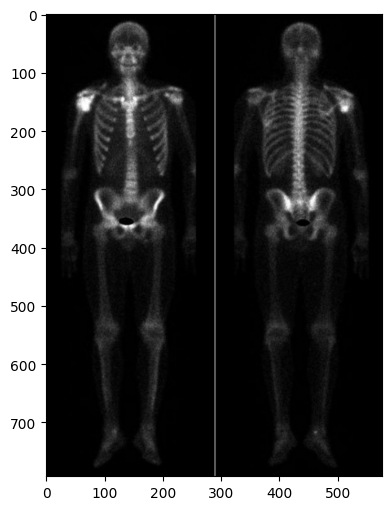

In [ ]:
# Đọc ảnh
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/ImageProject/Input_Image2_Project2.png', cv2.IMREAD_GRAYSCALE)

# Hiển thị ảnh
plt.figure(figsize=(10, 6))
plt.imshow(image, cmap = "gray")
plt.show()

##Laplacian filter of bone scan (a)

###Hàm tính tích chập

In [ ]:
def convolution2d(image, kernel, pad):
    m, n = kernel.shape
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
    y, x = image.shape
    y_out = y - m + 1
    x_out  = x - n + 1
    new_image = np.zeros((y_out, x_out))
    for i in range(y_out):
        for j in range(x_out):
            new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
    return new_image


###Hàm laplacian filter

In [ ]:
def laplacian_filter(image):
    # Define the Laplacian kernel
    kernel = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])
    pad = 1
    # Apply the kernel to the image using filter2D
    filtered_image = convolution2d(image,kernel,pad)

    return filtered_image

###Thực hiện tính toán laplacian

(-0.5, 576.5, 792.5, -0.5)

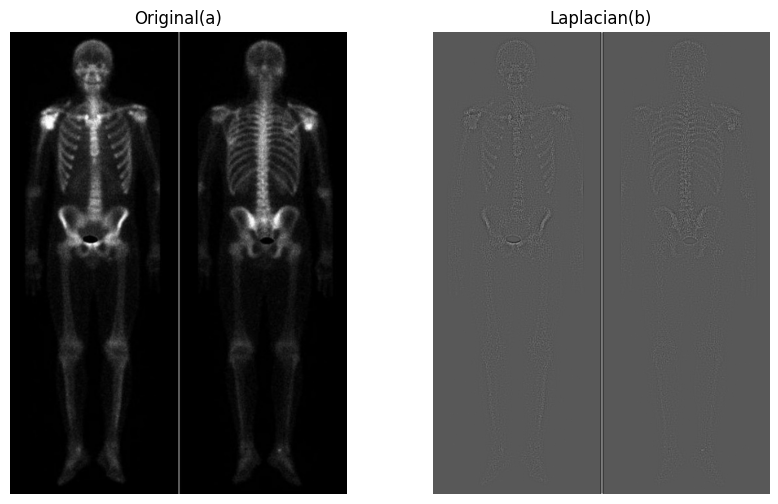

In [ ]:
laplacian_image = laplacian_filter(image)
# Hiển thị ảnh gốc và các ảnh kết quả
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original(a)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian(b)')
plt.axis('off')


##Sharpened version of bone scan achieved by subtracting (a) and (b)

###Hàm Thực hiện trừ 2 hình ảnh với nhau

In [ ]:
def subtract_images(img1, img2):
  rows, cols = img1.shape
  result = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value = int(img1[i, j]) - int(img2[i, j])
      # Giới hạn giá trị trong khoảng 0-255
      value = max(0, min(255, value))
      result[i, j] = value
  return result

###Thực hiện làm sắc nét ảnh

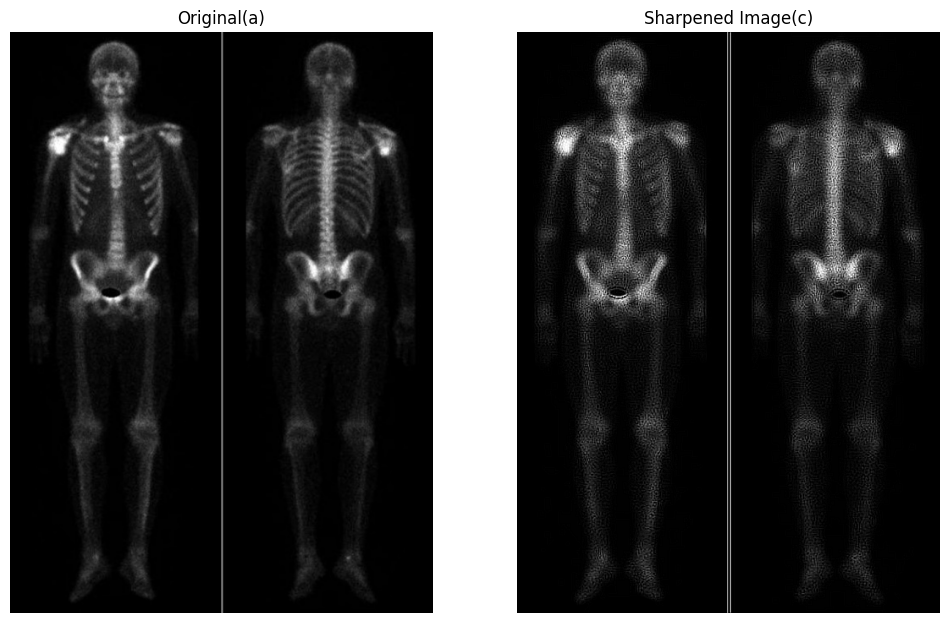

In [ ]:
sharpened_image_subtract = subtract_images(image, laplacian_image)
# Hiển thị ảnh gốc và các ảnh kết quả
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original(a)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_subtract, cmap='gray')
plt.title('Sharpened Image(c)')
plt.axis('off')

plt.show()

##Sobel filter of bone scan (c)

###Hàm cộng hai hình ảnh với nhau

In [ ]:
def add_images(img1, img2):
  rows, cols = img1.shape
  result = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value = int(img1[i, j]) + int(img2[i, j])
      # Giới hạn giá trị trong khoảng 0-255
      value = max(0, min(255, value))
      result[i, j] = value
  return result

###Hàm tính sobel_filter

In [ ]:
def sobel_filter(image):
    # Define Sobel kernels
    sobel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    img_Sobel_x = convolution2d(image, sobel_x, pad=1)
    img_Sobel_y = convolution2d(image, sobel_y, pad=1)
    img_Sobel_x_plus_y_ = add_images(img_Sobel_x,img_Sobel_y)
    result_img =  add_images(img_Sobel_x_plus_y_,image)

    return result_img


###Thực hiện tính sobel filter

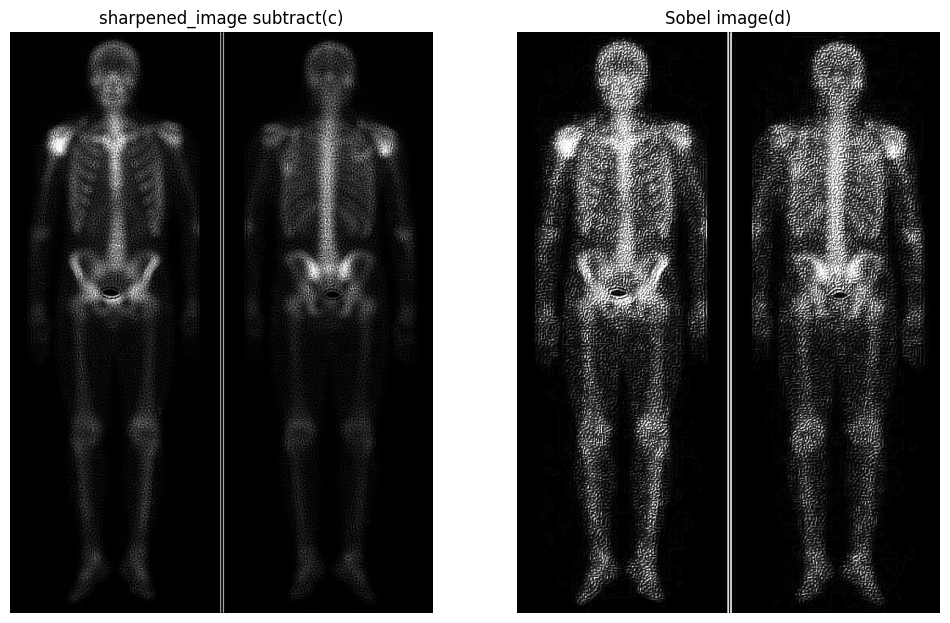

In [ ]:
sobel_image = sobel_filter(sharpened_image_subtract)

# Hiển thị ảnh gốc và các ảnh kết quả
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(sharpened_image_subtract, cmap='gray')
plt.title('sharpened_image subtract(c)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel image(d)')
plt.axis('off')

plt.show()

##Image (d) smoothed with a 5*5 averaging filter

###Hàm Average filter

In [ ]:
def average_filter(image):
  kernel = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25],
                    [1/25, 1/25, 1/25, 1/25, 1/25]])
  pad = 2
  filtered_image = convolution2d(image,kernel,pad)
  return filtered_image

###Thực hiện tính average filter

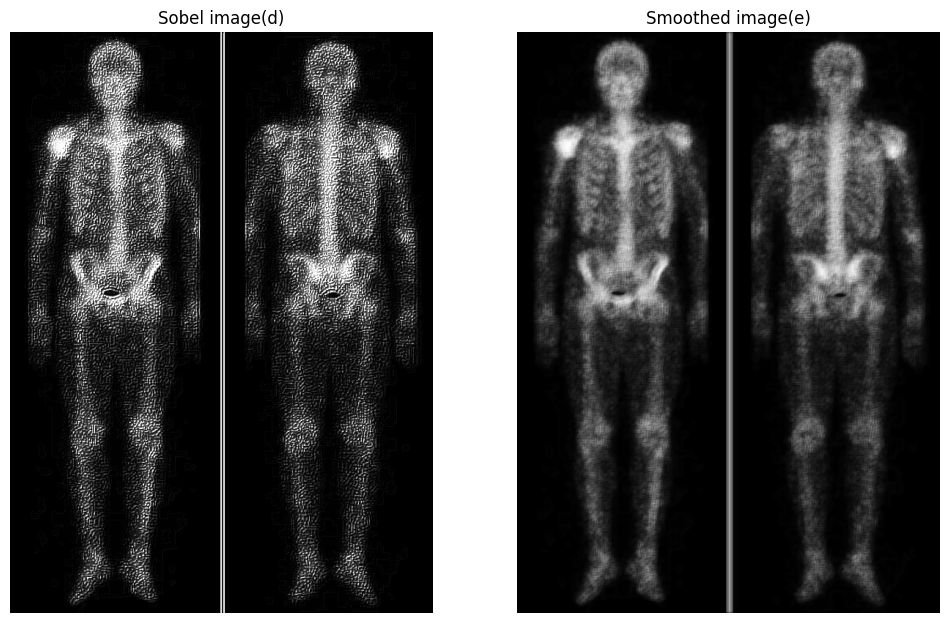

In [ ]:
smoothed_image = average_filter(sobel_image)
# Hiển thị ảnh gốc và các ảnh kết quả
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel image(d)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed image(e)')
plt.axis('off')

plt.show()

##The product of (c) and (e)

### Hàm nhân 2 ma trận

In [ ]:
def multiply_images(img1, img2):
  rows, cols = img1.shape
  result = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value = int(img1[i, j]) * int(img2[i, j])
      # Giới hạn giá trị trong khoảng 0-5
      value = max(0, min(5, value)) #Các vùng trên bề mặt da sẽ là 5 (đối với xương sẽ là 255)
      result[i, j] = value
  return result

### Nhân 2 ma trận với nhau

(-0.5, 576.5, 792.5, -0.5)

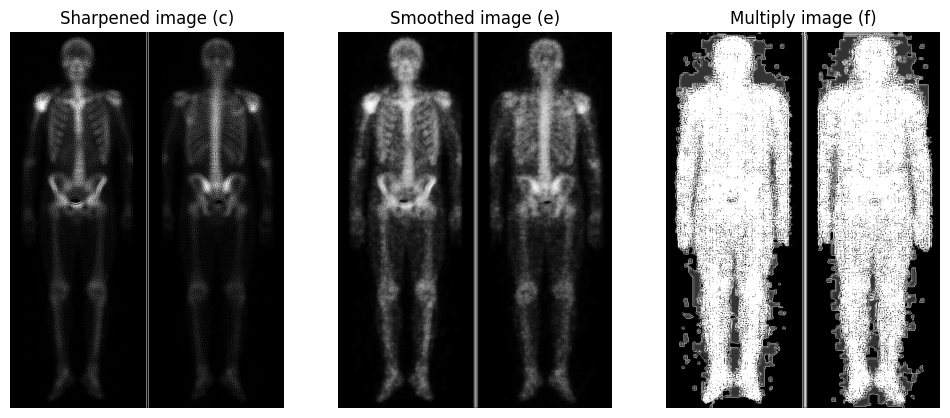

In [ ]:
multiply_image = multiply_images(sharpened_image_subtract, smoothed_image)

# Hiển thị ảnh gốc và ảnh kết quả
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(sharpened_image_subtract, cmap='gray')
plt.title('Sharpened image (c)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed image (e)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(multiply_image, cmap='gray')
plt.title('Multiply image (f)')
plt.axis('off')


## Sharpened image which is sum of (a) and (f)

(-0.5, 576.5, 792.5, -0.5)

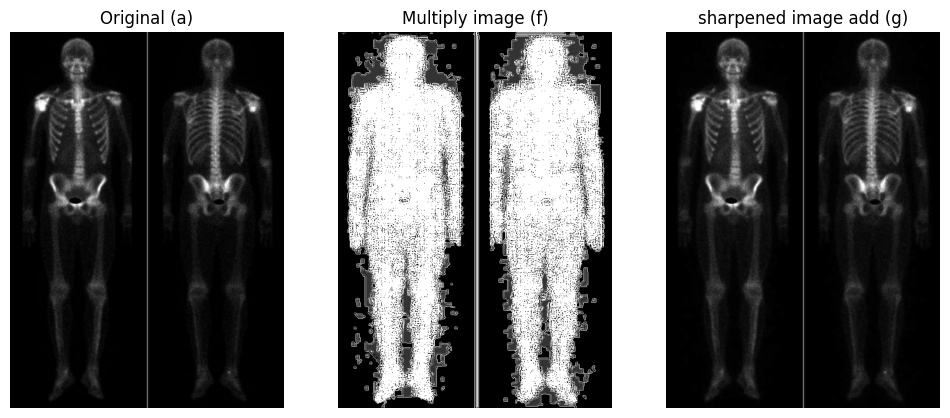

In [ ]:
# Hiển thị ảnh gốc và ảnh kết quả
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original (a)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(multiply_image, cmap='gray')
plt.title('Multiply image (f)')
plt.axis('off')

sharpened_image_add = add_images(image, multiply_image)
#Thực hiện công 2 hai hình ảnh là gốc và ảnh multiply
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image_add, cmap='gray')
plt.title('sharpened image add (g)')
plt.axis('off')

## Result of applying a power-law trans. to (g)

### Chuyển đổi luật mũ cho hình ảnh đã được làm sắc nét

In [ ]:
def power_law_transformation(image):
    gamma = 0.5
    result =image ** gamma
    return result

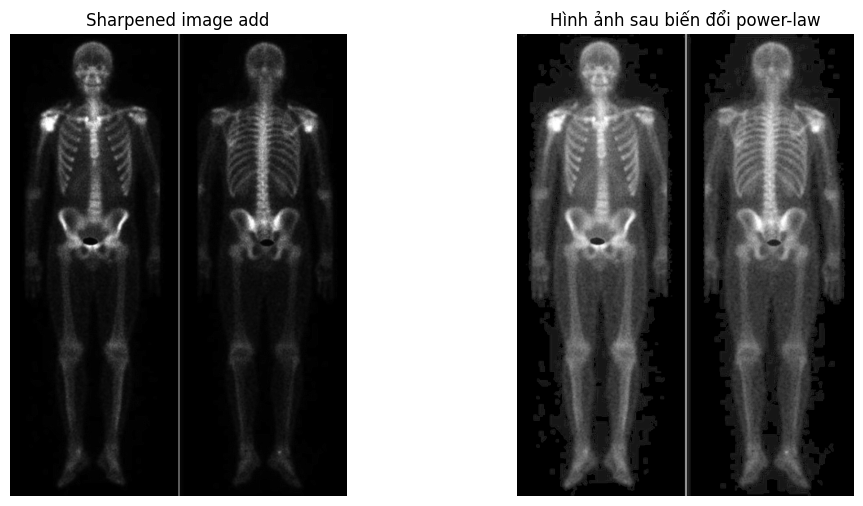

In [ ]:

# Áp dụng biến đổi power-law
power_law_image = power_law_transformation(sharpened_image_add)

# Hiển thị hình ảnh gốc và hình ảnh đã biến đổi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sharpened_image_add, cmap='gray')
plt.title('Sharpened image add')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(power_law_image, cmap='gray')
plt.title('Hình ảnh sau biến đổi power-law')
plt.axis('off')

plt.show()